In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data set
data = pd.read_csv('sdsc.csv')
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In this data set we are required to classify the space objects into 3 categories.

1- Star
2 - Galaxy 
3 - quasars

we know about the stars and galaxy.
Quasars are the brightest and most distant objects in the known universe.
It has been suggested that quasars contain massive black holes and may represent a stage in the evolution of some galaxies.

# ABOUT THE INPUTS

just like we locate any place on earth using Latitude and Longitude, in space we locate any object with the help of ra - right ascension( like longititude) and dec - declination (like latitude). These are an important features for us to locate the objects and classify them as it will play an important role of distance.

u, g, r, i, z — filter bands (a.k.a. photometric system or astronomical magnitudes) [The britness of steller objects are defined in terms of magnitudes]. Any steller object cannot be identified with its size or distance, so we need the brightness level and type of rays of the object to identify them.

run, rerun, camcol, field — descriptors of fields (i.e. 2048 x 1489 pixels) within image

redshift — increase in wavelength due to motion of astronomical object

plate — plate number

mjd — modified Julian date of observation

fiberid — optic fiber ID

objid - Object ID

specobjid = Object Identifier


In [3]:
#I wil be removing irrelavant columns such as objid,specobjid and fiberid, as they only indicates
#the id number of the object.

data.drop(['objid','specobjid','fiberid'],axis=1,inplace=True)

In [4]:
#Also remove rerun column, as there is no variance in the values, there is only one value that is 301
data.drop('rerun',axis=1,inplace=True)

In [5]:
#checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   camcol    10000 non-null  int64  
 9   field     10000 non-null  int64  
 10  class     10000 non-null  object 
 11  redshift  10000 non-null  float64
 12  plate     10000 non-null  int64  
 13  mjd       10000 non-null  int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 1.1+ MB


we can see that we have only one categorical variable that is class variable which is our target variable.

In [6]:
#checking missing values
data.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
dtype: int64

we do not have any missing values in our data set.

In [7]:
#checking statistical values of ou data
data.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,0.143726,1460.986400,52943.533300
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,0.388774,1788.778371,1511.150651
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,-0.004136,266.000000,51578.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,0.000081,301.000000,51900.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,0.042591,441.000000,51997.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,0.092579,2559.000000,54468.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,5.353854,8410.000000,57481.000000


# UNIVARIAITE ANALYSIS

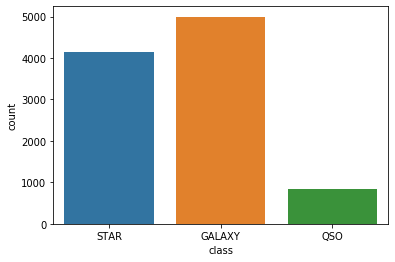

In [8]:
#checking the count of objects class wise
sns.countplot(x='class',data=data)


In [9]:
cat = data.groupby('class').count()

In [10]:
cat.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd
class,,,,,,,,,,,,,
GALAXY,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998
QSO,850,850,850,850,850,850,850,850,850,850,850,850,850
STAR,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152


from the above graph we can see that our scietists have discovered a huge number of galaxies and stars, Kudos to them.
Only 8.5% of the Quasars has been found till now, 
reserch is still going on.
Galaxies found are 49.98% and STARS found are 41.52%.



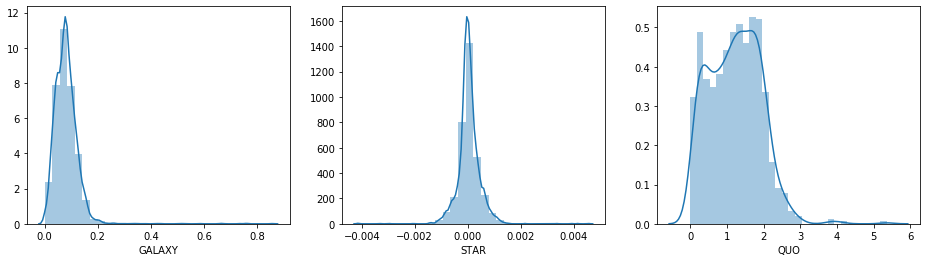

In [11]:
#checking the distribution of redshift among Classes ( GALAXY , STAR , QUARSARS)
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
sns.distplot(data[data['class']=='GALAXY']['redshift'],bins=30,ax=axes[0],axlabel='GALAXY')

sns.distplot(data[data['class']=='STAR']['redshift'],bins=30,ax=axes[1],axlabel='STAR')

sns.distplot(data[data['class']=='QSO']['redshift'],bins=30,ax=axes[2],axlabel='QUO')


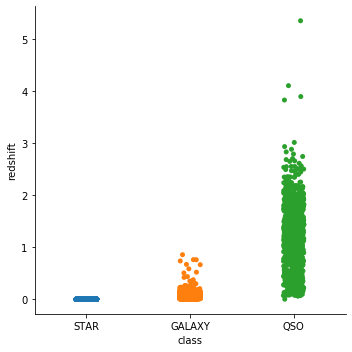

In [12]:
sns.catplot(x='class',y='redshift',data=data)

redshift is  the wavelength of the light is stretched.
low frequency redshift means that the object is far away(as the wave lenth high)
high frequency redshift means that the object is near(as the wave length low)
source - https://www.youtube.com/watch?v=A-vHAxc6djs&t=15s

Above we can see that the star is having uniform distribution of redshift, we can see a high frequency distribution between -0.004 to 0.004, from this we can see that redshifts for STARS is low. which proves that most of the stars are closer to the earth,

For Galaxy , we can see that it is rightly skewed, and the frequency keeps on rising.

Quosars - The redshift values for QSOs are a lot more uniformly distributed than for Stars or Galaxies. They are roughly evenly distributed from 0 to 3, than the occurences decrease drastically.

Above distribution shows us  that based on redshifts most of the stars observed are somewhat closer to the earth than galaxies or quasars. Galaxies tend to be a little further away and quasars are distant from very close to very far.

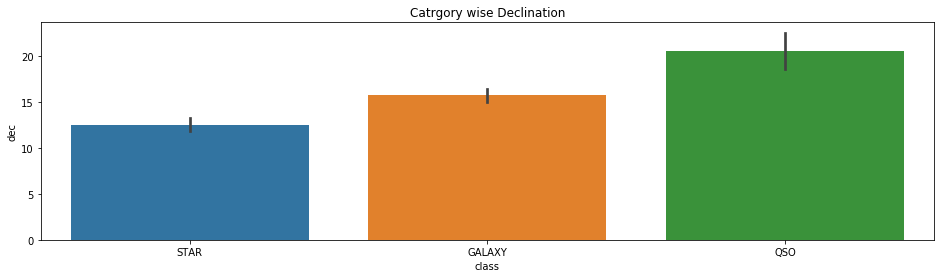

In [13]:
plt.figure(figsize=(16,4))
sns.barplot(x=data['class'], y=data['dec'])
plt.title('Catrgory wise Declination')
plt.show()

here we can see that the average of declination for STAR , Galaxy and Quosars is 12.54 , 15.76 and 20.57 respectively

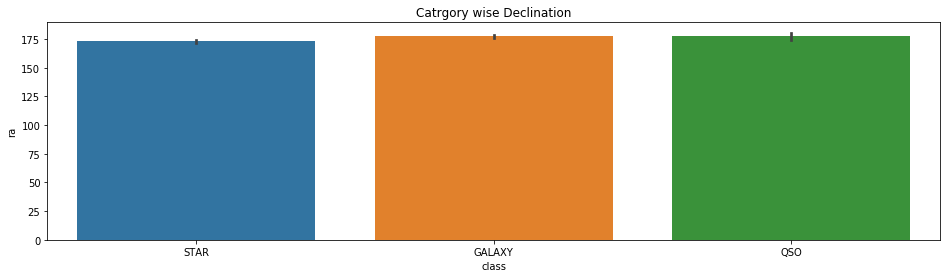

In [14]:
plt.figure(figsize=(16,4))
sns.barplot(x=data['class'], y=data['ra'])
plt.title('Catrgory wise Declination')
plt.show()

there is not much diff in the avg right ascension of star, galaxy and quosars.

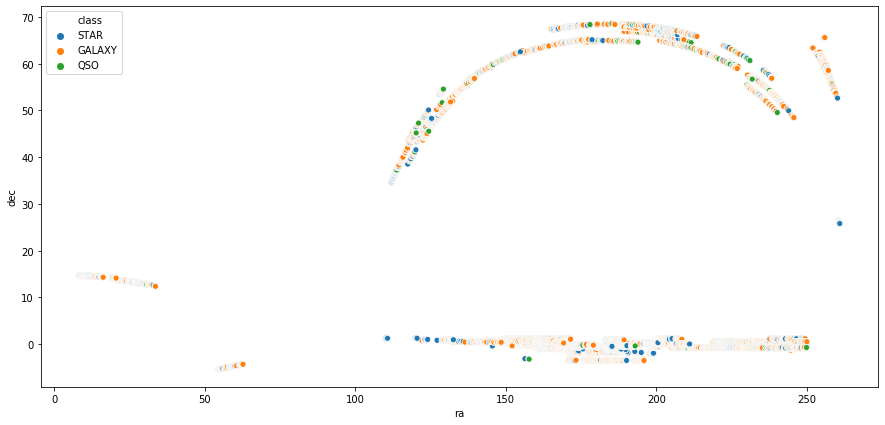

In [15]:
#now we know that right ascension and  declination  are used as the coordinates for locationg an object, 
#I will be using scatterplot of right ascension and declination to plot the objects with respect to each class
#the center of observer will be 0,0 axis.

plt.figure(figsize=(15,7))
sns.scatterplot(x='ra',y='dec',hue='class',data=data)
plt.show()

from the above graph it is hard to tell on which area what class of object is more, as we can see that at every coordinate there is a mixture of star, galaxy and quosars.
However it seems that quosars are located when ra >100 and dec >30. 

In [16]:
#checking mjd for each class.

df_star = data.loc[data['class']=='STAR']
df_galaxy = data.loc[data['class']=='GALAXY']
df_qso = data.loc[data['class']=='QSO']

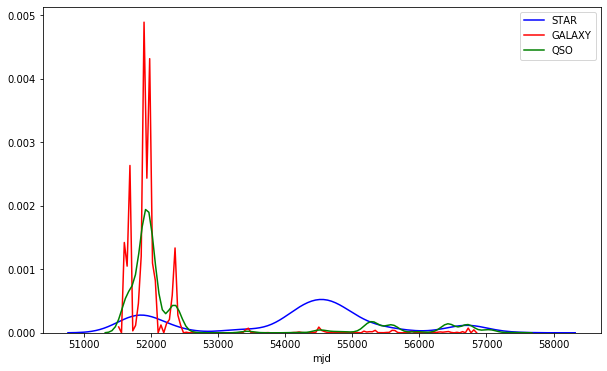

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(df_star['mjd'],color='blue',hist=False,label='STAR')
sns.distplot(df_galaxy['mjd'],color='red',hist=False,label='GALAXY')
sns.distplot(df_qso['mjd'],color='green',hist=False,label='QSO')
plt.show()

here question arises that from 51500 to 52100 mjd or (1st april 2000) discorvery of Galaxy and Quosars were the most. 
you can convert the values of modified julian date from here : http://www.csgnetwork.com/julianmodifdateconv.html



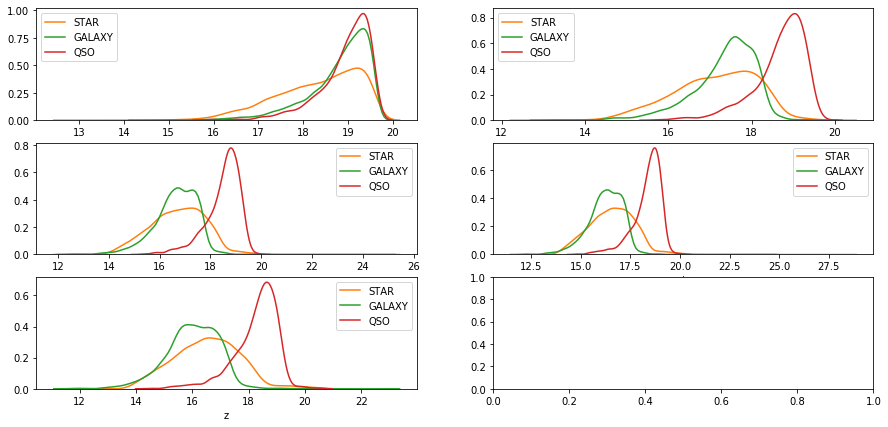

In [18]:
#checking the relation of the ugriz band among the stars, galaxy and quosars

fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(15,7))
sns.distplot(df_star['u'],color='C1',label='STAR',ax=axes[0,0],hist=False)
sns.distplot(df_galaxy['u'],color='C2',label='GALAXY',ax=axes[0,0],hist=False)
sns.distplot(df_qso['u'],color='C3',label='QSO',ax=axes[0,0],hist=False)
plt.xlabel='U'

sns.distplot(df_star['g'],color='C1',label='STAR',ax=axes[0,1],hist=False)
sns.distplot(df_galaxy['g'],color='C2',label='GALAXY',ax=axes[0,1],hist=False)
sns.distplot(df_qso['g'],color='C3',label='QSO',ax=axes[0,1],hist=False)
plt.xlabel='G'

sns.distplot(df_star['r'],color='C1',label='STAR',ax=axes[1,0],hist=False)
sns.distplot(df_galaxy['r'],color='C2',label='GALAXY',ax=axes[1,0],hist=False)
sns.distplot(df_qso['r'],color='C3',label='QSO',ax=axes[1,0],hist=False)
plt.xlabel='R'

sns.distplot(df_star['i'],color='C1',label='STAR',ax=axes[1,1],hist=False)
sns.distplot(df_galaxy['i'],color='C2',label='GALAXY',ax=axes[1,1],hist=False)
sns.distplot(df_qso['i'],color='C3',label='QSO',ax=axes[1,1],hist=False)
plt.xlabel='I'

sns.distplot(df_star['z'],color='C1',label='STAR',ax=axes[2,0],hist=False)
sns.distplot(df_galaxy['z'],color='C2',label='GALAXY',ax=axes[2,0],hist=False)
sns.distplot(df_qso['z'],color='C3',label='QSO',ax=axes[2,0],hist=False)
plt.xlabel='Z'
plt.show()



above we have plotted ugriz band wrt stars,galaxy and qso,
They refer to the response of the object to the different frequency bands of the telescope.
we can see that every color band is almost ranging to 15-20, however we can see thatfpr quosars the range is higher as compared with those of stars and galaxy in all bands.

and with we can see some sililar graphs with in g,r,i,z bands, there seems to be a high correlation among these.
U seems less correlated.

# LABEL ENCODING

In [19]:
#for outlier detection and removal of outliers we should have numerical column, so I will be converting the 
#class column using label encoder.
#after encoding  Gaalaxy = 0, Star = 2 and Quosars = 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
data['class'] = pd.DataFrame(data['class'])

In [20]:
data['class'].unique()

array([2, 0, 1])

In [21]:
data.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,2,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,2,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,2,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,2,0.000590,3306,54922


# OUTLIER DETECTION

In [22]:
#I will be using zscore for detecting and removing outliers.
from scipy.stats import zscore


In [23]:
z = np.abs(zscore(data))

In [24]:
threshold = 3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9992, 9994, 9997], dtype=int64), array([11, 11, 11, ..., 12, 12, 12], dtype=int64))


In [25]:
new_data =data[(z<3).all(axis = 1)]
new_data.shape

(8713, 14)

initially we had 10000 observation, after removing the outliers we are left with 8713 observations.


# Correlation Matrix

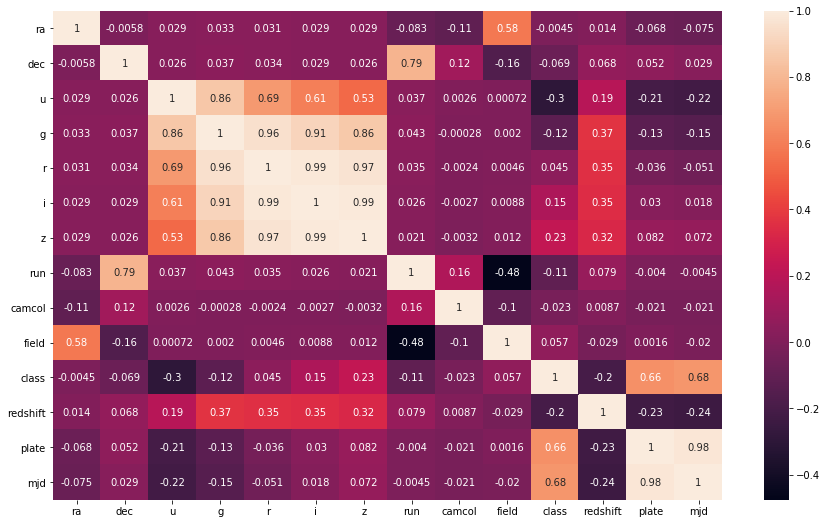

In [26]:
plt.figure(figsize=(15,9))
sns.heatmap(new_data.corr(),annot=True,)
plt.show()

we can see that plate, mjd is highly positively correlated with class variable.

Will be removing these columns as they are less correlated to our target variables (run,camcol,field) , ra and dec are also showing less correlation, however I will be keeping those as they represents the coordinates of the object.

Well according to me, I think the modt important factor for classifying a steller object is wavelength and color of the light, coordinates can be used to locate the position only.

In [27]:
data.drop(['run','camcol','field'],axis=1,inplace=True)

# Splitting into Inputs and Output Variable

In [28]:
X = data.drop('class',axis=1)
X.head()

,ra,dec,u,g,r,i,z,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922


In [29]:
y = data['class']
y.head()

0    2
1    2
2    0
3    2
4    2
Name: class, dtype: int32

# SCALING INPUT VARIABLES

In [30]:
#I will be using min max scaler, so that we will have each value ranging between 0 to 1
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.693832,0.074025,0.980965,0.595954,0.284177,0.219081,0.322108,0.000770,0.373281,0.566492
1,0.694098,0.074642,0.858250,0.620126,0.343138,0.279811,0.426021,0.000762,0.006999,0.006268
2,0.694422,0.074519,0.967188,0.757385,0.407640,0.316657,0.462532,0.023749,0.002579,0.075385
3,0.695175,0.073487,0.722499,0.534197,0.301490,0.248584,0.382616,0.000751,0.373281,0.566492
4,0.695225,0.074199,0.689960,0.486538,0.323925,0.283858,0.445782,0.000882,0.373281,0.566492


# Cross Validation test

In [31]:
#importing algorithms and evaluation metrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [32]:
#checking cross validation
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
         GaussianNB()]

for model in models:
    print("model name =",model)
    model.scores = cross_val_score(model, X, y, cv=10)
    print('Model scores :',model.scores)
    print('Model mean score: ',model.scores.mean())
    print('Model std score :', model.scores.std())
    print('\n')

model name = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Model scores : [0.936 0.899 0.93  0.896 0.884 0.905 0.862 0.9   0.931 0.916]
Model mean score:  0.9059000000000001
Model std score : 0.021924643668712177


model name = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Model scores : [0.944 0.913 0.947 0.916 0.9   0.927 0.866 0.902 0.93  0.923]
Model mean score:  0.9168
Model std score : 0.02250688783461631


model name = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
           

In [33]:
#I dont need to use the grid search, as I am getting 99% accuracy with Random forest. I will create a loop for best random state to build our model.

#checking best Random state.
max_rfc_score = 0
for r_state in range(41,100):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=.33,random_state=r_state)
    rfc = RandomForestClassifier()
    rfc.fit(x_train,y_train)
    rfc_pred = rfc.predict(x_test)
    Accuracy = accuracy_score(y_test,rfc_pred)
    if Accuracy>max_rfc_score:
        max_rfc_score=Accuracy
        final_r_state = r_state

In [34]:
print('max accuracy for the given ','', final_r_state, 'is', max_rfc_score)

max accuracy for the given   59 is 0.9933333333333333


In [35]:
#creating final model
#splitting into train and test
x_train_n,x_test_n,y_train_n,y_test_n= train_test_split(X,y,test_size=.33,random_state=59)

In [36]:
rfc_new = RandomForestClassifier()
rfc_model = rfc_new.fit(x_train_n,y_train_n)
rfc_pred_n = rfc_new.predict(x_test_n)

In [37]:
Final_accuracy = accuracy_score(y_test_n,rfc_pred_n)

In [38]:
Final_accuracy

0.9927272727272727

In [39]:
print('confusion matrix:','\n', confusion_matrix(y_test_n,rfc_pred_n))

confusion matrix: 
 [[1627    5   11]
 [   8  267    0]
 [   0    0 1382]]


In [40]:
print('classification report:','\n', classification_report(y_test_n,rfc_pred_n))

classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1643
           1       0.98      0.97      0.98       275
           2       0.99      1.00      1.00      1382

    accuracy                           0.99      3300
   macro avg       0.99      0.99      0.99      3300
weighted avg       0.99      0.99      0.99      3300



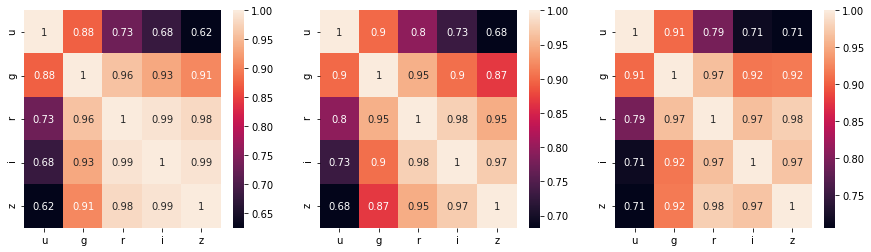

In [58]:
#we have above seen that all the bands were showing high correlation.
#I will try to build a model with doing PCA, as with those features there is a case of multicollinearity.
#I will 1st plot the heatmap to show the correlation of ugriz band and then do a PCA on those only
#after that will create a new model.

#checking the correlation of ugriz band for each class.
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,4))
sns.heatmap(data[data['class']==0][['u','g','r','i','z']].corr(),annot=True,ax=axes[0])
sns.heatmap(data[data['class']==1][['u','g','r','i','z']].corr(),annot=True,ax=axes[1])
sns.heatmap(data[data['class']==2][['u','g','r','i','z']].corr(),annot=True,ax=axes[2])

here we can see that Except U every other band is highly positvely correlated to each other. Which can cause multicolinearity. I will use PCA with these 4 highly correlated bands and make them 1.

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=1)
pca_val = pca.fit_transform(data[['g','r','i','z']])
pca_val = pca_val.reshape(-1,)
pca_val

array([-1.80915121, -0.21401208,  1.12884039, ...,  1.50214423,
        1.37207655, -1.16222813])

In [63]:
pca_val = pd.Series(pca_val, name='pca_val')
pca_val = pd.DataFrame(pca_val)
pca_val.head()

,pca_val
0,-1.809151
1,-0.214012
2,1.128840
3,-1.259402
4,-0.570706


In [64]:
#concatinating the pca column with our data set and then droping the columns [[g,r,i,z]]
df = data.drop(['g','r','i','z'],axis=1)
df = pd.concat([df,pca_val],axis=1)
df.head()

,ra,dec,u,class,redshift,plate,mjd,pca_val
0,183.531326,0.089693,19.47406,2,-0.000009,3306,54922,-1.809151
1,183.598371,0.135285,18.66280,2,-0.000055,323,51615,-0.214012
2,183.680207,0.126185,19.38298,0,0.123111,287,52023,1.128840
3,183.870529,0.049911,17.76536,2,-0.000111,3306,54922,-1.259402
4,183.883288,0.102557,17.55025,2,0.000590,3306,54922,-0.570706


I will now be creating a model using random forest using the train and test of df.

In [83]:
#splitting df into train and test 
n_x = df.drop('class',axis=1)
n_y = df['class']

# SCALING THE PCA CONVERTED DATA

In [84]:
n_x = mms.fit_transform(n_x)
n_x = pd.DataFrame(n_x)
n_x.head()

,0,1,2,3,4,5,6
0,0.693832,0.074025,0.980965,0.000770,0.373281,0.566492,0.341745
1,0.694098,0.074642,0.858250,0.000762,0.006999,0.006268,0.417607
2,0.694422,0.074519,0.967188,0.023749,0.002579,0.075385,0.481470
3,0.695175,0.073487,0.722499,0.000751,0.373281,0.566492,0.367890
4,0.695225,0.074199,0.689960,0.000882,0.373281,0.566492,0.400643


In [85]:
#checking skewness
n_x.skew()

0   -1.227350
1    1.191544
2   -1.219795
3    4.265729
4    1.794609
5    1.039610
6   -0.006228
dtype: float64

In [86]:
#I will not be reducing the skewness, as I have already sclaed the data into MinMax , that is why I have not checked and reduced the skewness earlier.


In [87]:
#creating model
x_tr,x_te,y_tr,y_te= train_test_split(n_x,n_y,test_size=.33,random_state=59)
rfc_n = RandomForestClassifier()
rfc_mod = rfc_n.fit(x_tr,y_tr)
rfc_pre_new = rfc_n.predict(x_te)

In [88]:
New_accuracy =accuracy_score(y_te,rfc_pre_new)
print('Accuracy after PCA is :', New_accuracy)

Accuracy after PCA is : 0.9924242424242424


In [89]:
New_confusionmatrix =confusion_matrix(y_te,rfc_pre_new)
print('confusion matrix after PCA is :','\n', New_confusionmatrix)

confusion matrix after PCA is : 
 [[1626    8    9]
 [   8  267    0]
 [   0    0 1382]]


In [90]:
New_classficationreport =classification_report(y_te,rfc_pre_new)
print('classification report after PCA is :','\n', New_classficationreport)

classification report after PCA is : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1643
           1       0.97      0.97      0.97       275
           2       0.99      1.00      1.00      1382

    accuracy                           0.99      3300
   macro avg       0.99      0.99      0.99      3300
weighted avg       0.99      0.99      0.99      3300



In [91]:
#Saving the results into .csv
rfc_pre_new

array([0, 0, 0, ..., 0, 2, 0])

In [92]:
result = pd.DataFrame(rfc_pre_new)
result.head()

,0
0,0
1,0
2,0
3,0
4,0


In [93]:
#saving wrt indexing of the test data
result.index = x_te.index 
result.columns = ["prediction"]
result.to_csv("prediction_results.csv")

In [94]:

#saving the model
from sklearn.externals import joblib
joblib.dump(rfc_pre_new,'SDSC.pkl')

['SDSC.pkl']